In [ ]:
## uncomment these if you upload this on google drive and mount the drive
from google.colab import drive
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


#### Q1. Loading Data

Run the below cell to load CIFAR-10 train and test data.
Answer the corresponding questions in the overleaf document

In [ ]:
## Define transforms to apply on images
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

## defining training and test data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

\
## creating data loaders
batch_size = 16 ## set the batch size value
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

## image labels in cifar 10
class_labels = classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_size = len(train_data)
print("Train data size:", train_size)
test_size = len(test_data)
print("Test data size:", test_size)

Train data size: 50000
Test data size: 10000


### Helper function
To display images in the training set

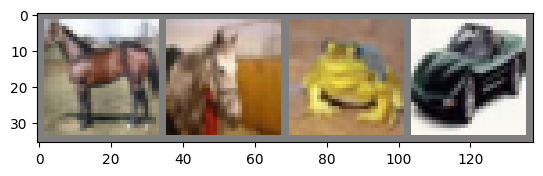

horse horse  frog   car


In [ ]:
# function to display images in the training set
def display(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


## displaying images in 1 batch of the training set

# get 1 batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
display(torchvision.utils.make_grid(images[0:4]))
# print labels
print(' '.join('%5s' % class_labels[labels[j]] for j in range(4)))


### Q2. Classifier Architecture

In [ ]:
## Defining Classifier architecture

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        #self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Q3. Training the network

(i) Training on CPU

[1, 250] loss: 2.303
[1, 500] loss: 2.300
[1, 750] loss: 2.297
[1, 1000] loss: 2.286
[1, 1250] loss: 2.252
[1, 1500] loss: 2.150
[1, 1750] loss: 2.020
[1, 2000] loss: 1.958
[1, 2250] loss: 1.896
[1, 2500] loss: 1.838
[1, 2750] loss: 1.787
[1, 3000] loss: 1.728
[2, 250] loss: 1.692
[2, 500] loss: 1.657
[2, 750] loss: 1.640
[2, 1000] loss: 1.594
[2, 1250] loss: 1.582
[2, 1500] loss: 1.538
[2, 1750] loss: 1.542
[2, 2000] loss: 1.546
[2, 2250] loss: 1.534
[2, 2500] loss: 1.516
[2, 2750] loss: 1.482
[2, 3000] loss: 1.487
[3, 250] loss: 1.448
[3, 500] loss: 1.449
[3, 750] loss: 1.450
[3, 1000] loss: 1.402
[3, 1250] loss: 1.410
[3, 1500] loss: 1.385
[3, 1750] loss: 1.378
[3, 2000] loss: 1.397
[3, 2250] loss: 1.369
[3, 2500] loss: 1.385
[3, 2750] loss: 1.350
[3, 3000] loss: 1.349
Training Complete


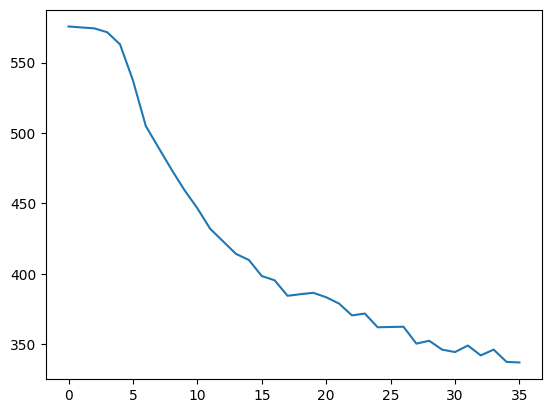

In [ ]:
### Complete the code in the training box

## for reproducibility
torch.manual_seed(7)
np.random.seed(7)

## Instantiating classifier
net = Net()

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
device = torch.device("cpu")


## Defining Training Parameters

num_epochs = 3 # 3 for CPU training, 20 for GPU training
running_loss_list = [] # list to store running loss in the code below
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #===============================================#
        # Fill in the training loop here.

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) # Forward pass: compute the predicted outputs
        loss = criterion(outputs, labels) # Loss between predicted outputs and actual labels
        loss.backward() # Backward pass: compute gradients of the loss with respect to model parameters
        optimizer.step() # Update the model parameters based on the gradients

        #===============================================#
        # print statistics
        running_loss += loss.cpu().item()
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format\
             (epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0

print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)

## complete the code to plot the running loss per 250 mini batches curve

def plot_loss_curve(running_loss_list):
  ## complete code
  plt.plot(running_loss_list)

plot_loss_curve(running_loss_list)

(ii) Paste the above code in the code block below and modify it to use GPUs for training


cuda:0
[1, 250] loss: 2.304
[1, 500] loss: 2.300
[1, 750] loss: 2.298
[1, 1000] loss: 2.290
[1, 1250] loss: 2.268
[1, 1500] loss: 2.203
[1, 1750] loss: 2.095
[1, 2000] loss: 2.037
[1, 2250] loss: 1.984
[1, 2500] loss: 1.947
[1, 2750] loss: 1.950
[1, 3000] loss: 1.863
[1, 3250] loss: 1.843
[1, 3500] loss: 1.790
[1, 3750] loss: 1.754
[1, 4000] loss: 1.762
[1, 4250] loss: 1.709
[1, 4500] loss: 1.718
[1, 4750] loss: 1.689
[1, 5000] loss: 1.684
[1, 5250] loss: 1.633
[1, 5500] loss: 1.669
[1, 5750] loss: 1.700
[1, 6000] loss: 1.647
[1, 6250] loss: 1.572
[1, 6500] loss: 1.599
[1, 6750] loss: 1.553
[1, 7000] loss: 1.558
[1, 7250] loss: 1.521
[1, 7500] loss: 1.529
[1, 7750] loss: 1.531
[1, 8000] loss: 1.506
[1, 8250] loss: 1.540
[1, 8500] loss: 1.484
[1, 8750] loss: 1.495
[1, 9000] loss: 1.535
[1, 9250] loss: 1.516
[1, 9500] loss: 1.476
[1, 9750] loss: 1.476
[1, 10000] loss: 1.403
[1, 10250] loss: 1.481
[1, 10500] loss: 1.453
[1, 10750] loss: 1.427
[1, 11000] loss: 1.427
[1, 11250] loss: 1.462


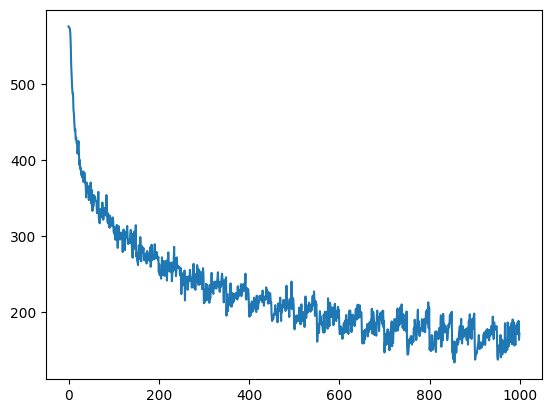

In [ ]:
### Copy the code from (i), and modify it to run on GPUs for 20 epochs

## for reproducibility
torch.manual_seed(7)
np.random.seed(7)

## Instantiating classifier
net = Net()

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)
net.to(device)

## Defining Training Parameters

num_epochs = 20 # 3 for CPU training, 20 for GPU training
running_loss_list = [] # list to store running loss in the code below
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        #===============================================#
        # Fill in the training loop here.

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) # Forward pass: compute the predicted outputs
        loss = criterion(outputs, labels) # Loss between predicted outputs and actual labels
        loss.backward() # Backward pass: compute gradients of the loss with respect to model parameters
        optimizer.step() # Update the model parameters based on the gradients

        #===============================================#
        # print statistics
        running_loss += loss.cpu().item()
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format\
             (epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0

print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)


def plot_loss_curve(running_loss_list):
  ## complete code
  plt.plot(running_loss_list)

plot_loss_curve(running_loss_list)

### Testing the network

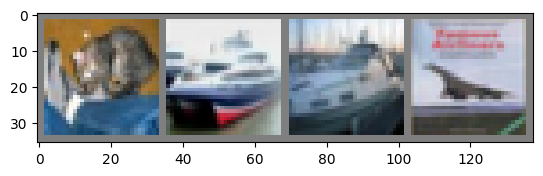

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane


In [ ]:
## displaying images from test set
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
display(torchvision.utils.make_grid(images[0:4]))
print('GroundTruth: ', ' '.join('%5s' % class_labels[labels[j]] for j in range(4)))

## Instantiating network and loading the trained model
net = Net()
net.load_state_dict(torch.load(PATH))

## Getting predicted label/class from the model output
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_labels[predicted[j]] for j in range(4)))

(iv) Complete the code below to test the network on the entire testing set.

In [ ]:

### Accuracy on whole data set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
acc  = 100*correct//total ## stores the accuracy computed in the above loop
print('Accuracy of the network on the 10000 test images: %d %%' % (acc))

Accuracy of the network on the 10000 test images: 59 %


(v) Convert the training code in part (iii) and testing code in part (iv) to define functions `train` and  `test` with function definitions as shown below. Train the network with different batch size and number of epochs. Use the `plot_loss_curve` function you defined in (i) above to plot the loss curves. Use the defined `train` and `test` functions to train the network for various configurations asked in (v) in the problem set.

In [ ]:
def train(train_loader=train_loader, num_epochs=20, use_gpu=True, lr=0.001, momentum=0.9, model_save_path='./net.pth'):
  """
  INPUTS
  num_epochs: number of training epochs
  use_gpu: False by default. If true, load the model and data to GPU for training
  lr: learning rate for SGD optimizer
  momentum: momentum for SGD optimizer
  model_save_path: save path for the trained model

  OUTPUTS
  returns running_loss_list: which stores the loss averaged over a minibatch of size 250
  """

  ## for reproducibility
  torch.manual_seed(7)
  np.random.seed(7)

  ## Instantiating classifier
  net = Net()

  ## Defining optimizer and loss function
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

  if use_gpu == True:
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print(device)
    net.to(device)

    ## Defining Training Parameters
    running_loss_list = [] # list to store running loss in the code below
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)
            #===============================================#
            # Fill in the training loop here.

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs) # Forward pass: compute the predicted outputs
            loss = criterion(outputs, labels) # Loss between predicted outputs and actual labels
            loss.backward() # Backward pass: compute gradients of the loss with respect to model parameters
            optimizer.step() # Update the model parameters based on the gradients

            #===============================================#
            # print statistics
            running_loss += loss.cpu().item()
            if i % 250 == 249:    # print every 250 mini-batches
                print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
                running_loss_list.append(running_loss)
                running_loss = 0.0

    print('Training Complete')
    PATH = './net.pth'
    torch.save(net.state_dict(), PATH)


  else:
    device = torch.device("cpu")

    ## Defining Training Parameters

    num_epochs = 3 # 3 for CPU training, 20 for GPU training
    running_loss_list = [] # list to store running loss in the code below
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            #===============================================#
            # Fill in the training loop here.

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs) # Forward pass: compute the predicted outputs
            loss = criterion(outputs, labels) # Loss between predicted outputs and actual labels
            loss.backward() # Backward pass: compute gradients of the loss with respect to model parameters
            optimizer.step() # Update the model parameters based on the gradients

            #===============================================#
            # print statistics
            running_loss += loss.cpu().item()
            if i % 250 == 249:    # print every 250 mini-batches
                print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
                running_loss_list.append(running_loss)
                running_loss = 0.0

    print('Training Complete')
    PATH = './net.pth'
    torch.save(net.state_dict(), PATH)


  ## complete the code.
  return running_loss_list

def test(test_loader=test_loader, model_path='./net.pth'):

  ### complete the code to compute accuracy and store it as the variable acc
  ### Accuracy on whole data set
  correct = 0
  total = 0
  with torch.no_grad():
      for data in test_loader:
          images, labels = data
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  acc  = 100*correct//total ## stores the accuracy computed in the above loop
  print('Accuracy of the network on the 10000 test images: %d %%' % (acc))

In [ ]:
x = train()

cuda:0
[1, 250] loss: 2.303
[1, 500] loss: 2.300
[1, 750] loss: 2.297
[1, 1000] loss: 2.286
[1, 1250] loss: 2.252
[1, 1500] loss: 2.150
[1, 1750] loss: 2.020
[1, 2000] loss: 1.958
[1, 2250] loss: 1.896
[1, 2500] loss: 1.838
[1, 2750] loss: 1.788
[1, 3000] loss: 1.727
[2, 250] loss: 1.693
[2, 500] loss: 1.657
[2, 750] loss: 1.640
[2, 1000] loss: 1.594
[2, 1250] loss: 1.583
[2, 1500] loss: 1.537
[2, 1750] loss: 1.543
[2, 2000] loss: 1.547
[2, 2250] loss: 1.534
[2, 2500] loss: 1.515
[2, 2750] loss: 1.482
[2, 3000] loss: 1.488
[3, 250] loss: 1.448
[3, 500] loss: 1.448
[3, 750] loss: 1.450
[3, 1000] loss: 1.399
[3, 1250] loss: 1.411
[3, 1500] loss: 1.385
[3, 1750] loss: 1.376
[3, 2000] loss: 1.395
[3, 2250] loss: 1.367
[3, 2500] loss: 1.384
[3, 2750] loss: 1.347
[3, 3000] loss: 1.348
[4, 250] loss: 1.314
[4, 500] loss: 1.305
[4, 750] loss: 1.320
[4, 1000] loss: 1.344
[4, 1250] loss: 1.286
[4, 1500] loss: 1.293
[4, 1750] loss: 1.275
[4, 2000] loss: 1.273
[4, 2250] loss: 1.253
[4, 2500] loss:

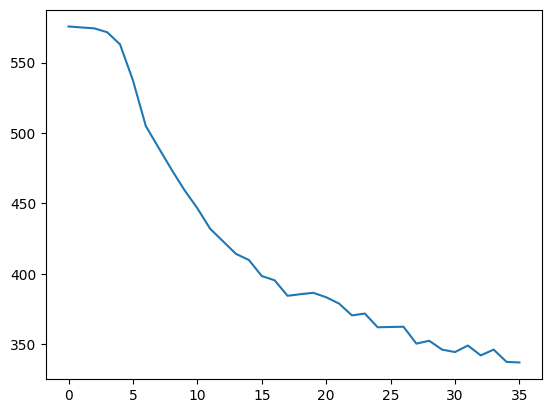

In [ ]:
def plot_loss_curve(x=running_loss_list):
  ## complete code
  plt.plot(running_loss_list)

plot_loss_curve(running_loss_list)

In [ ]:
test()

Accuracy of the network on the 10000 test images: 52 %
